# K-means Project

**AIM:** We want to classify houses according to their region and median income.

To do this, we will use the California Housing dataset. This dataset was constructed using data from the 1990 California census. It contains one row per census block group. A block group is the smallest geographic unit for which US Census data is published.

Let's do this!!

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

**Step 1:** Loading the dataset

In [30]:
import pandas as pd

raw_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")

raw_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In this case, we are only interested in the Latitude, Longitude and MedInc columns. So will drop the other variables and maintain 'Latitude', 'Longitude', 'MedInc':

In [31]:
# Drop unnecessary variables
cleaned_data = raw_data.drop(columns=['HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'MedHouseVal'])

# Save the cleaned dataset
cleaned_data.to_csv("cleaned_data.csv", index=False)
print("Cleaned dataset saved successfully.")

Cleaned dataset saved successfully.


In [32]:
from sklearn.model_selection import train_test_split

# Split the dataset into train and test sets
X_train, X_test = train_test_split(cleaned_data, test_size=0.2, random_state=42)

print("Dataset split into training and testing sets.")

Dataset split into training and testing sets.


**Step 2:** Build a K-Means model.

A. Classify the data into <ins>6 clusters using the K-Means model.</ins>

B. Then store the cluster to which each house belongs as a new column in the dataset --> Will call it <ins> Cluster</ins>.

(To introduce it into the dataset, we may need to categorize it accordingly.)

C. Plot it in a dot plot and describe what you see.


- A: Classify the Data into 6 Clusters: Will use KMeans with 6 clusters to classify the training data.

In [33]:
from sklearn.cluster import KMeans

# Initialize and fit the KMeans model
Kmeans_model = KMeans(n_clusters=6, n_init="auto", random_state=42)
Kmeans_model.fit(X_train)

print("K-means clustering applied successfully.")

K-means clustering applied successfully.


- B: Store the Cluster in the Dataset : new column called cluster to store the cluster assignments.


In [34]:
# Add the cluster labels to the dataset
X_train["cluster"] = Kmeans_model.labels_
X_train.head()

,MedInc,Latitude,Longitude,cluster
14196,3.2596,32.71,-117.03,3
8267,3.8125,33.77,-118.16,1
17445,4.1563,34.66,-120.48,1
14265,1.9425,32.69,-117.11,3
2271,3.5542,36.78,-119.80,5


- C: Visualize the Clusters: Will use scatterplots to visualize the clusters based on different combinations of variables.

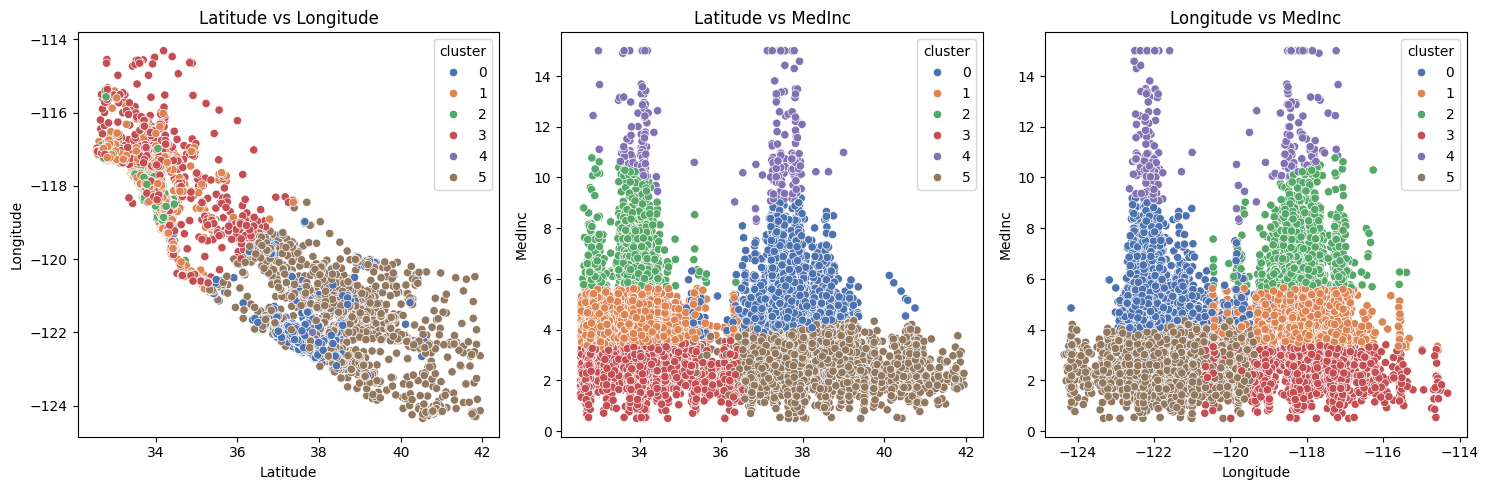

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create scatter plots
fig, axis = plt.subplots(1, 3, figsize=(15, 5))

sns.scatterplot(ax=axis[0], data=X_train, x="Latitude", y="Longitude", hue="cluster", palette="deep")
axis[0].set_title("Latitude vs Longitude")

sns.scatterplot(ax=axis[1], data=X_train, x="Latitude", y="MedInc", hue="cluster", palette="deep")
axis[1].set_title("Latitude vs MedInc")

sns.scatterplot(ax=axis[2], data=X_train, x="Longitude", y="MedInc", hue="cluster", palette="deep")
axis[2].set_title("Longitude vs MedInc")

plt.tight_layout()
plt.show()

Will explore the **'Elbow Technique'.**

<ins>It helps determine the optimal number of clusters by minimizing the within-cluster sum of squares (WCSS).</ins> The idea is to plot the WCSS against the number of clusters and look for an "elbow point," where the reduction in WCSS starts to diminish significantly.

Although the project indicates that 6 clusters should be applied in the exercise, I want to determine the ideal k in this scenario.

Let's Apply It! Here's how we can implement the elbow technique:

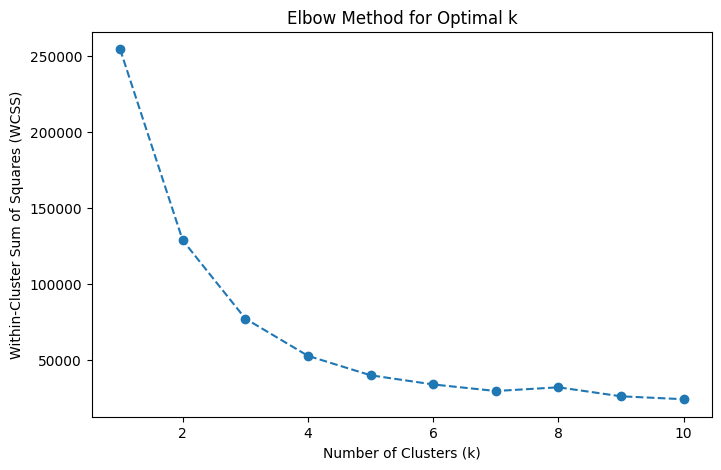

In [36]:
# Apply the elbow method
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []  # List to store within-cluster sum of squares
cluster_range = range(1, 11)  # Testing 1 to 10 clusters

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, n_init="auto", random_state=42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)  # WCSS for each k

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, wcss, marker="o", linestyle="--")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.title("Elbow Method for Optimal k")
plt.show()

It seems like with k = 4 there is no much variation in the **WCSS**.

Will use k = 4 in the model and compare results:

Step A: Classify the data into 4 clusters using K-Means

In [37]:
# Applying K-Means with k=4
model_unsup_4 = KMeans(n_clusters=4, n_init="auto", random_state=42)
model_unsup_4.fit(X_train)

KMeans(n_clusters=4, random_state=42)

In [38]:
# Adding cluster assignments as a new column
X_train["cluster"] = model_unsup_4.labels_
X_train.head()

,MedInc,Latitude,Longitude,cluster
14196,3.2596,32.71,-117.03,1
8267,3.8125,33.77,-118.16,2
17445,4.1563,34.66,-120.48,2
14265,1.9425,32.69,-117.11,1
2271,3.5542,36.78,-119.80,3


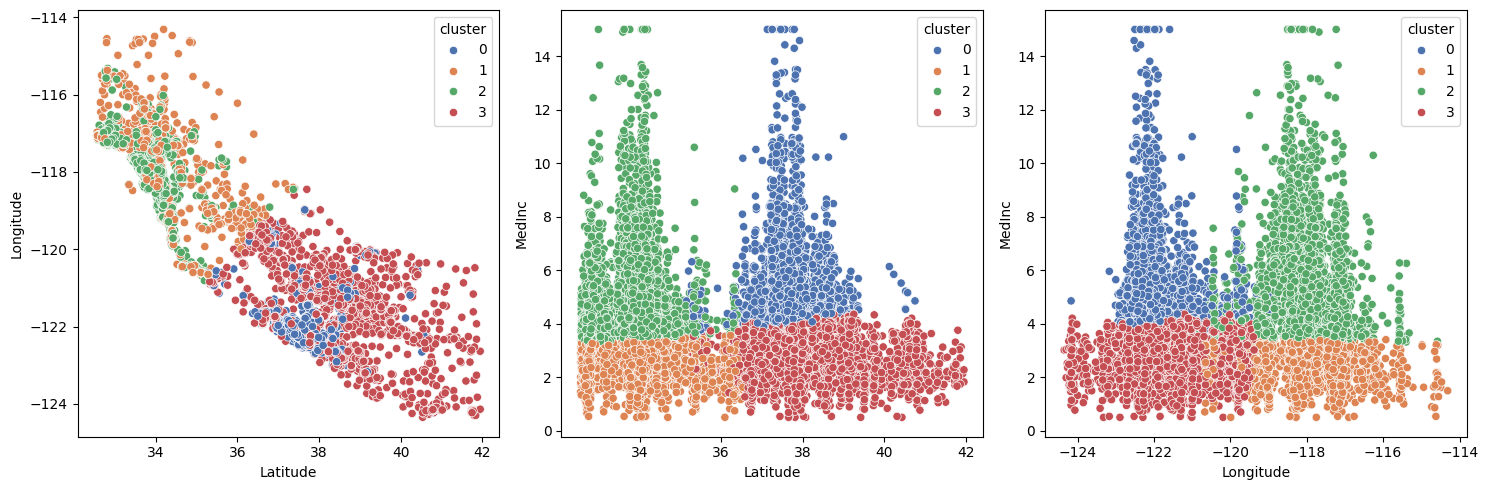

In [39]:
# Visualizing the clusters
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(1, 3, figsize=(15, 5))

sns.scatterplot(ax=axis[0], data=X_train, x="Latitude", y="Longitude", hue="cluster", palette="deep")
sns.scatterplot(ax=axis[1], data=X_train, x="Latitude", y="MedInc", hue="cluster", palette="deep")
sns.scatterplot(ax=axis[2], data=X_train, x="Longitude", y="MedInc", hue="cluster", palette="deep")

plt.tight_layout()
plt.show()

- For **k = 4** housing groups seem to be well seeparated and respect the groups found in the forst example for **K = 6**. How ever, k = 6 separates well 2 groups more, so will continue with the k sugested = 6.

Step 3: Predict with the test set


In [40]:
# Step 1: Predict clusters for the test dataset
y_test = Kmeans_model.predict(X_test)

# Step 2: Add the predicted clusters to the test dataset
X_test["cluster"] = y_test

# Display the first few rows of the test dataset with clusters
X_test.head()

,MedInc,Latitude,Longitude,cluster
20046,1.6812,36.06,-119.01,3
3024,2.5313,35.14,-119.46,3
15663,3.4801,37.80,-122.44,5
20484,5.7376,34.28,-118.72,2
9814,3.7250,36.62,-121.93,5


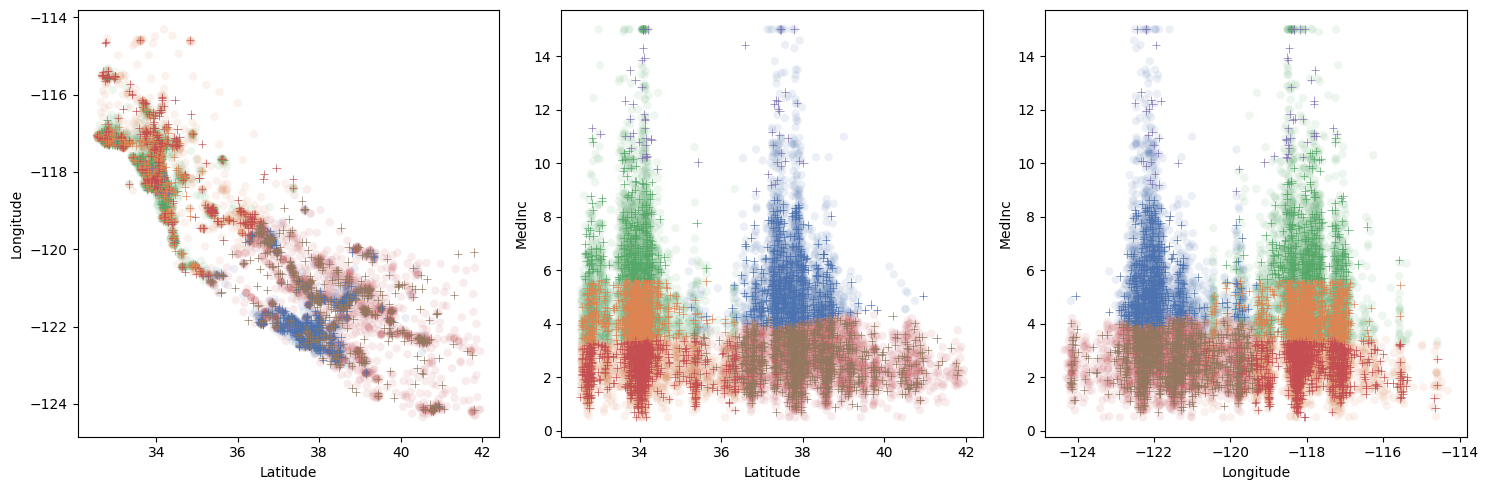

In [41]:
# Visualising both train and test data on the same scatter plot
fig, axis = plt.subplots(1, 3, figsize=(15, 5))

# Plot for Latitude vs Longitude
sns.scatterplot(
    ax=axis[0], 
    data=X_train, 
    x="Latitude", 
    y="Longitude", 
    hue="cluster", 
    palette="deep", 
    alpha=0.1
)
sns.scatterplot(
    ax=axis[0], 
    data=X_test, 
    x="Latitude", 
    y="Longitude", 
    hue="cluster", 
    palette="deep", 
    marker="+"
)

# Plot for Latitude vs MedInc
sns.scatterplot(
    ax=axis[1], 
    data=X_train, 
    x="Latitude", 
    y="MedInc", 
    hue="cluster", 
    palette="deep", 
    alpha=0.1
)
sns.scatterplot(
    ax=axis[1], 
    data=X_test, 
    x="Latitude", 
    y="MedInc", 
    hue="cluster", 
    palette="deep", 
    marker="+"
)

# Plot for Longitude vs MedInc
sns.scatterplot(
    ax=axis[2], 
    data=X_train, 
    x="Longitude", 
    y="MedInc", 
    hue="cluster", 
    palette="deep", 
    alpha=0.1
)
sns.scatterplot(
    ax=axis[2], 
    data=X_test, 
    x="Longitude", 
    y="MedInc", 
    hue="cluster", 
    palette="deep", 
    marker="+"
)

# Adjust layout and remove legends from individual plots for a cleaner display
plt.tight_layout()
for ax in axis:
    ax.legend([], [], frameon=False)

plt.show()

Both sets, **Train & Test**, fall into the same groups hence, seems like the model separates well data. 

**Step 4:** Train a supervised classification model

Will find a suopervised machine learning model useful for classification and train it and evaluate the results obtained.

(This flow is very common when we have unlabeled data: use an unsupervised learning model to label it automatically, and then a supervised learning model.)



Given that our assessment is about classicifation, I will try **'Random Forest'** model.
- Random Forest classifiers are robust and perform well on structured data, handling interactions and non-linearities between features effectively.
-  It handles the mix of continuous and spatial data well, and it's easy to interpret feature importance.

This model seems to meet perfectly all the characteristics needed for the project:


Accuracy: 0.9942


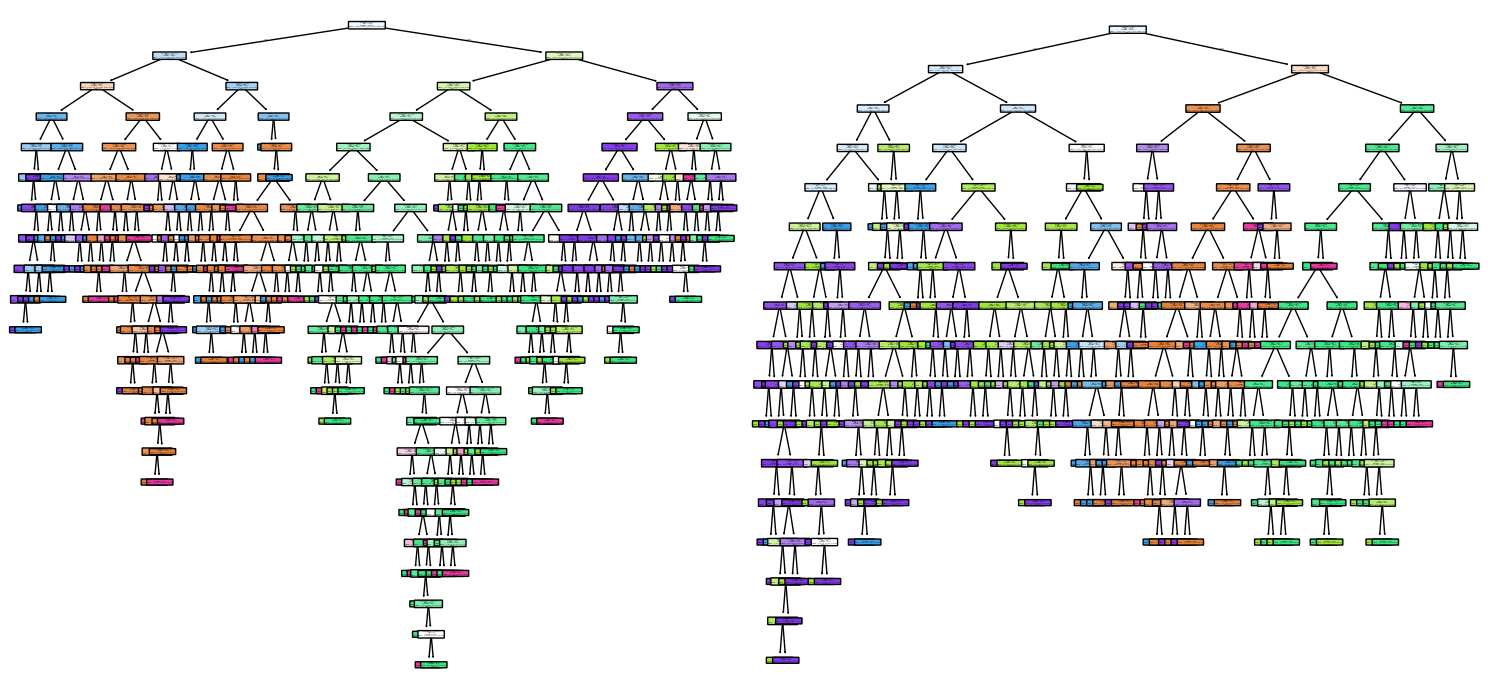

In [62]:
# Make sure to assign the cluster labels from KMeans to the dataset
cleaned_data["cluster"] = Kmeans_model.labels_

# Now, you should be able to use the 'cluster' column
X = cleaned_data[['Latitude', 'Longitude', 'MedInc']]  # Features
y = cleaned_data['cluster']  # Use the 'cluster' labels from KMeans as the target variable

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict the clusters using the trained model
y_pred = rf_model.predict(X_test)

# Check accuracy (since you have 6 clusters)
from sklearn.metrics import accuracy_score
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Optionally, plot some of the decision trees again (as you did before)
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
for i, ax in enumerate(axes):
    plot_tree(rf_model.estimators_[i], 
              filled=True, 
              ax=ax, 
              feature_names=X.columns, 
              class_names=[str(i) for i in range(6)],  # Map to 6 clusters (0 to 5)
              rounded=True, 
              proportion=True)
plt.tight_layout()
plt.show()

The model is very accurate!⭐

I seems like we could predict very well with a 'Random Forest' model the classification in our dataset.

Lets save the models:

In [65]:
from pickle import dump

# Save the KMeans model with k = 6
dump(Kmeans_model, open("/workspaces/K-means-Project.FGM/models/k_means_default_6_clusters.sav", "wb"))

# Save the Random Forest model
dump(rf_model, open("/workspaces/K-means-Project.FGM/models/random_forest_classifier_default_42.sav", "wb"))